# Pré-traitement des données et apprentissage de la position sur la colonne description (sans doublons)

## Modules à importer

In [1]:
import pandas as pd
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import FrenchStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

## Lecture du fichier CSV et création de la dataframe

In [2]:
opinion_df = pd.read_csv ("./data_website_tab.csv", sep="\t", names=["titre", "description","position","theme"],dtype={"titre":"object","description":"object","position":"category","theme":"category"},header=None)

In [3]:
opinion_df.head(40)

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
4,3 Députés demandent au gouvernement d'intégrer...,Question écrite de M. Dimitri Houbron député ...,Agit pour les animaux,mer-pisciculture
5,3 Députés demandent au gouvernement d'intégrer...,Question écrite de M. Dimitri Houbron député ...,Agit pour les animaux,elevage
6,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale
7,La ville de Montpellier vote un vœu visant à i...,Le Conseil municipal de la ville de Montpelli...,Agit pour les animaux,zoo-cirque
8,"Éric Piolle, maire de Grenoble, soutient le Ré...",Dans une vidéo publiée sur le compte Twitter ...,Agit pour les animaux,droit-animal
9,"Anne Hidalgo, maire de Paris, et Christophe Na...",À l'occasion de la journée mondiale des anima...,Agit pour les animaux,droit-animal


## Suppression des lignes vides

In [4]:
opinion_df_clean = opinion_df.dropna(how='any')

## Récupération des index des lignes sans texte ne contenant que des espaces 

In [5]:
opinion_df_spaces = opinion_df_clean[(opinion_df_clean.description == " ") |(opinion_df_clean.description == "  ")]

## Suppression des lignes ayant uniquement des espaces

In [6]:
opinion_df_clean2 = opinion_df_clean.drop(index=opinion_df_spaces.index)

## Remplacement du jeu de données initial par le jeu de données nettoyé

In [7]:
opinion_df= opinion_df_clean2

# Suppression des doublons

## Nombre de lignes pour chaque position avant suppression des doublons 

In [8]:
opinion_df.position.value_counts()

Agit pour les animaux        3899
Agit contre les animaux      2768
Penche pour les animaux       565
Penche contre les animaux     326
Name: position, dtype: int64

## Suppression des doublons de la colonne description 

In [9]:
opinion_df_clean3 = opinion_df.drop_duplicates(subset=['description'])

In [10]:
opinion_df_clean3.head(30)

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
4,3 Députés demandent au gouvernement d'intégrer...,Question écrite de M. Dimitri Houbron député ...,Agit pour les animaux,mer-pisciculture
6,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale
7,La ville de Montpellier vote un vœu visant à i...,Le Conseil municipal de la ville de Montpelli...,Agit pour les animaux,zoo-cirque
8,"Éric Piolle, maire de Grenoble, soutient le Ré...",Dans une vidéo publiée sur le compte Twitter ...,Agit pour les animaux,droit-animal
9,"Anne Hidalgo, maire de Paris, et Christophe Na...",À l'occasion de la journée mondiale des anima...,Agit pour les animaux,droit-animal
10,Tours baptise un jardin du nom de l'éléphant F...,Extrait du site de la ville de Tours : Homma...,Agit pour les animaux,droit-animal


## Nombre de lignes pour chaque position après suppression des doublons 

In [11]:
opinion_df_clean3.position.value_counts()

Agit pour les animaux        3222
Agit contre les animaux      2445
Penche pour les animaux       510
Penche contre les animaux     244
Name: position, dtype: int64

## Remplacement des index manquants (supprimés avec drop_duplicates) par de nouveaux index réordonnés 

In [12]:
opinion_df_clean3 = opinion_df_clean3.reset_index(drop=True)

## Remplacement du jeu de données initial par le jeu de données nettoyé

In [13]:
opinion_df = opinion_df_clean3

## Extraction pour position

In [14]:
X = opinion_df[["description"]]
y = opinion_df.position

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Créations des différentes fonctions utilisées


In [16]:
class SingleColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, data_dict):
        return data_dict[self.key]

In [17]:
def split_into_tokens_nltk(desc) :
    return word_tokenize(desc)

In [18]:
fs = FrenchStemmer()
def split_into_stems(desc):
    words = word_tokenize(desc)
    return [fs.stem(w) for w in words]

## Liste des nombres et lois + signes de ponctuation

In [19]:
stopwords = open('stopwords_list.txt','r').read().split()
nblaw_stopwords = stopwords+list(string.punctuation)

## Pipeline pour la colonne description et transformation du texte en vecteurs avec TfidfVectorizer

In [23]:
desc_vectorizer = TfidfVectorizer(tokenizer=split_into_stems,lowercase=True, stop_words=nblaw_stopwords,min_df=0.01)

description_pipeline = make_pipeline(
    SingleColumnSelector(key="description"),
    desc_vectorizer
)

# Application de la pipeline à X_train
description_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('singlecolumnselector',
                 SingleColumnSelector(key='description')),
                ('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=0.01, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_...
                                             '03633', '04654', '0507S', '0529G',
                                             '05860', '06227', '0635S', '06657',
                                             '06942', '0714G', '07714', '07795',
                                             '08060', '08152', '08361', '09384',
                                             '

## Affichage des traits

In [24]:
res = description_pipeline.transform(X_test.head())
print("Input descriptions")
print(X_test.description.head())
print("Output bags of words")

bow = pd.DataFrame(res.toarray(), columns=desc_vectorizer.get_feature_names())
bow.set_index(X_test.head().index, inplace=True)
bow.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input descriptions
1620     Il lui demande donc les mesures que compte pr...
6410     Programme FN pour les élections présidentiell...
1195     Or les cirques ne peuvent assurer aux animaux...
3887     Jean Boyer a attribué 16 000 € pour l'aménage...
5405     Sur le site de la liste "Aimons Pau" de Franc...
Name: description, dtype: object

Output bags of words


,'',...,000,2012,2017,``,a,abattu,activ,afin,...,écolog,écrit,égal,élect,élevag,élément,établ,être,’,€
1620,0.000000,0.000000,0.03792,0.00000,0.000000,0.000000,0.019337,0.000000,0.075672,0.000000,...,0.000000,0.036121,0.000000,0.000000,0.00000,0.000000,0.039357,0.050971,0.000000,0.000000
6410,0.120910,0.000000,0.00000,0.16496,0.000000,0.120162,0.000000,0.000000,0.000000,0.114991,...,0.000000,0.000000,0.000000,0.209987,0.12086,0.000000,0.000000,0.000000,0.144430,0.000000
1195,0.000000,0.023604,0.00000,0.00000,0.081963,0.000000,0.017500,0.058416,0.000000,0.000000,...,0.031394,0.032690,0.031192,0.000000,0.00000,0.049106,0.035619,0.023065,0.000000,0.000000
3887,0.044028,0.000000,0.40762,0.00000,0.000000,0.043755,0.181878,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.567841
5405,0.093858,0.000000,0.00000,0.00000,0.000000,0.093277,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.146004,0.112116,0.000000


## Pipeline pour les statistique textuelles

In [25]:
class TextStats(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, descs):
        return [{'stats_length': len(text),
                 'stats_num_sentences': text.count('.')+text.count('!')+text.count('?')}
                for text in descs]
    
stats_vectorizer = DictVectorizer()

stats_pipeline = make_pipeline(
    SingleColumnSelector(key="description"),
    TextStats(),
    stats_vectorizer
)

stats_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('singlecolumnselector',
                 SingleColumnSelector(key='description')),
                ('textstats', TextStats()),
                ('dictvectorizer',
                 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=',
                                sort=True, sparse=True))],
         verbose=False)

## Application sur les premières instances de X_test

In [26]:
res = stats_pipeline.transform(X_test.head())
print("Input")
print(X_test.description.head())
print("Output")

stats = pd.DataFrame(res.toarray(), columns=stats_vectorizer.get_feature_names())
stats.set_index(X_test.head().index)

Input
1620     Il lui demande donc les mesures que compte pr...
6410     Programme FN pour les élections présidentiell...
1195     Or les cirques ne peuvent assurer aux animaux...
3887     Jean Boyer a attribué 16 000 € pour l'aménage...
5405     Sur le site de la liste "Aimons Pau" de Franc...
Name: description, dtype: object

Output


,stats_length,stats_num_sentences
1620,2183.0,11.0
6410,378.0,2.0
1195,2477.0,14.0
3887,628.0,7.0
5405,492.0,3.0


## Union des pipelines

In [27]:
union = FeatureUnion(transformer_list = [
        ("description_feature", description_pipeline),
        ("stats_features", stats_pipeline)
    ])

preprocess_pipeline = make_pipeline(
    union
)

preprocess_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('description_feature',
                                                 Pipeline(memory=None,
                                                          steps=[('singlecolumnselector',
                                                                  SingleColumnSelector(key='description')),
                                                                 ('tfidfvectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                               

## Application sur les premières instances de X_test

In [28]:
res = preprocess_pipeline.transform(X_test.head())
print("Input")
print(X_test.head())
print("Output")

all_features = pd.DataFrame(res.toarray(), 
                            columns=description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
                            + stats_pipeline.named_steps['dictvectorizer'].get_feature_names()
                           )
all_features.set_index(X_test.head().index, inplace=True)
all_features.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input
                                            description
1620   Il lui demande donc les mesures que compte pr...
6410   Programme FN pour les élections présidentiell...
1195   Or les cirques ne peuvent assurer aux animaux...
3887   Jean Boyer a attribué 16 000 € pour l'aménage...
5405   Sur le site de la liste "Aimons Pau" de Franc...

Output


,'',...,000,2012,2017,``,a,abattu,activ,afin,...,égal,élect,élevag,élément,établ,être,’,€,stats_length,stats_num_sentences
1620,0.000000,0.000000,0.03792,0.00000,0.000000,0.000000,0.019337,0.000000,0.075672,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.039357,0.050971,0.000000,0.000000,2183.0,11.0
6410,0.120910,0.000000,0.00000,0.16496,0.000000,0.120162,0.000000,0.000000,0.000000,0.114991,...,0.000000,0.209987,0.12086,0.000000,0.000000,0.000000,0.144430,0.000000,378.0,2.0
1195,0.000000,0.023604,0.00000,0.00000,0.081963,0.000000,0.017500,0.058416,0.000000,0.000000,...,0.031192,0.000000,0.00000,0.049106,0.035619,0.023065,0.000000,0.000000,2477.0,14.0
3887,0.044028,0.000000,0.40762,0.00000,0.000000,0.043755,0.181878,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.567841,628.0,7.0
5405,0.093858,0.000000,0.00000,0.00000,0.000000,0.093277,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.146004,0.112116,0.000000,492.0,3.0


## Affichage du nombre de traits générés par chacune des chaines 

In [29]:
fnames_desc = description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
fnames_stat = stats_pipeline.named_steps['dictvectorizer'].get_feature_names()
print('Nombres de traits extraits à partir de la colonne description :', len(fnames_desc))
print('Nombres de traits statistiques :', len(fnames_stat))

Nombres de traits extraits à partir de la colonne description : 2086
Nombres de traits statistiques : 2


## Comparaison des modèles

Mutinomial NB
                           precision    recall  f1-score   support

  Agit contre les animaux       0.75      0.75      0.75      2445
    Agit pour les animaux       0.72      0.82      0.77      3222
Penche contre les animaux       0.16      0.14      0.15       244
  Penche pour les animaux       0.62      0.07      0.12       510

                 accuracy                           0.71      6421
                macro avg       0.56      0.45      0.45      6421
             weighted avg       0.70      0.71      0.68      6421

accuracy 0.7252918287937743
confusion matrix
                            Agit contre les animaux  Agit pour les animaux  \
Agit contre les animaux                        368                    119   
Agit pour les animaux                           72                    546   
Penche contre les animaux                       14                     20   
Penche pour les animaux                         20                     74   

               

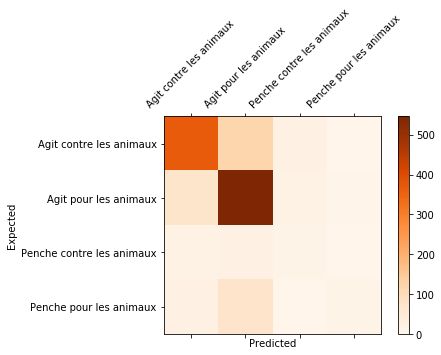

KNN
                           precision    recall  f1-score   support

  Agit contre les animaux       0.40      0.47      0.43      2445
    Agit pour les animaux       0.51      0.55      0.53      3222
Penche contre les animaux       0.00      0.00      0.00       244
  Penche pour les animaux       0.02      0.00      0.00       510

                 accuracy                           0.46      6421
                macro avg       0.23      0.26      0.24      6421
             weighted avg       0.41      0.46      0.43      6421

accuracy 0.44980544747081713
confusion matrix
                            Agit contre les animaux  Agit pour les animaux  \
Agit contre les animaux                        219                    278   
Agit pour les animaux                          267                    358   
Penche contre les animaux                       23                     19   
Penche pour les animaux                         49                     55   

                        

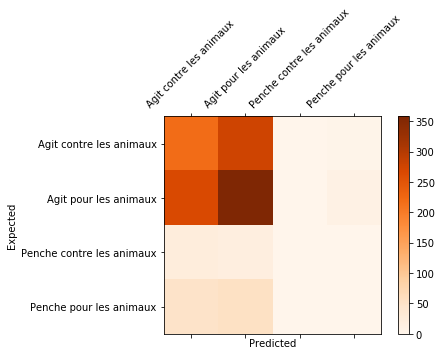

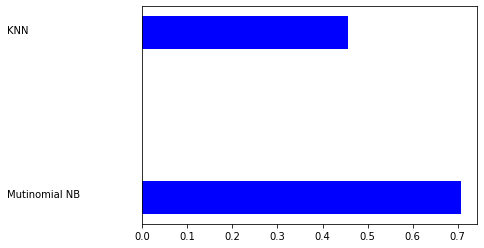

In [30]:
models = [
    ('Mutinomial NB', MultinomialNB()),
    ('KNN', KNeighborsClassifier()),
]
# Evaluation de chaque résultat
scores = []
names = []
scoring = 'accuracy'

# Validation croisée à 5 plis
kfold = model_selection.KFold(n_splits=5, shuffle=True)
for name, model in models:
    names.append(name)
    print(name)
    model_pipeline = make_pipeline(preprocess_pipeline,model)
    y_pred = model_selection.cross_val_predict(model_pipeline, X, y, 
                                               cv=kfold, n_jobs=2)
    print(classification_report(y, y_pred))
    acc = metrics.accuracy_score(y, y_pred)
    scores.append(acc)
    model_pipeline.fit(X_train, y_train)
    all_predictions = model_pipeline.predict(X_test)
    
    # all_predictions : classes prédites par l'algorithme d'apprentissage pour les données de test
    print('accuracy', accuracy_score(y_test, all_predictions))
    
    # Liste des labels se trouvant dans les données de test
    labels = np.unique(y_test)
    
    # Matrice de confusion
    cm =  confusion_matrix(y_test, all_predictions, labels=labels)
    
    # Matrice de confusion sous forme de DataFrame
    confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
    print('confusion matrix\n', confusion_df)
    print('(row=expected, col=predicted)')
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, all_predictions, labels) 
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Oranges) 
    fig.colorbar(cax) 
    tick_marks = np.arange(len(labels))
    labels_for_fig = [l for l in labels]
    plt.xticks(tick_marks, labels_for_fig, rotation=45)
    plt.yticks(tick_marks, labels_for_fig) 
    plt.xlabel('Predicted') 
    plt.ylabel('Expected') 
    plt.show()
    
# Représentation graphique
indices = np.arange(len(scores))
fig = plt.figure()
plt.barh(indices, scores, .2, label="score", color='b')
plt.yticks(())
for i, c in zip(indices, names):
    plt.text(-.3, i, c)
plt.show()

## Chaîne de prétraitement sans les traits concernant les statistiques

In [32]:
description = FeatureUnion(transformer_list = [
        ("description_feature", description_pipeline),
    ])

preprocess_pipeline = make_pipeline(
    description
)

preprocess_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('description_feature',
                                                 Pipeline(memory=None,
                                                          steps=[('singlecolumnselector',
                                                                  SingleColumnSelector(key='description')),
                                                                 ('tfidfvectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                               

## Exemple d'application pour les 5 premières instances de X_test

In [33]:
res = preprocess_pipeline.transform(X_test.head())
print("Input")
print(X_test.head())
print()
print("Output")

all_features = pd.DataFrame(res.toarray(), 
                            columns=description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()                           )
all_features.set_index(X_test.head().index, inplace=True)
all_features.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input
                                            description
4559   des animaux venus des contrées lointaines : t...
1115   Insérer la question animale dans les programm...
5192   Ils sont près de 9 000 chaque année à être la...
3805   la cavalerie de Laura-Maria Gruss (...) le ba...
1225   la filière d'élevage et d'entraînement de pon...

Output


,'',...,000,``,a,abandon,actuel,adhérent,animal,annuel,...,à,échang,écrit,éleph,élevag,éleveur,équip,étud,être,’
4559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208745,0.000000,...,0.000000,0.000000,0.000000,0.339906,0.000000,0.000000,0.000000,0.00000,0.000000,0.341413
1115,0.071826,0.000000,0.000000,0.071556,0.000000,0.000000,0.000000,0.138952,0.194905,0.000000,...,0.147592,0.122228,0.000000,0.000000,0.071436,0.000000,0.000000,0.10028,0.000000,0.382532
5192,0.000000,0.000000,0.136777,0.000000,0.000000,0.088397,0.000000,0.000000,0.000000,0.000000,...,0.097058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.181986,0.000000
3805,0.000000,0.182247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.405734,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1225,0.000000,0.058208,0.000000,0.000000,0.021562,0.000000,0.042584,0.000000,0.000000,0.126358,...,0.060265,0.000000,0.040017,0.000000,0.000000,0.044236,0.061637,0.00000,0.056499,0.000000


## Affichage du nombre de traits générés par la chaine description 

In [35]:
fnames_desc = description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
print('Nombres de traits extraits à partir de la colonne description :', len(fnames_desc))

Nombres de traits extraits à partir de la colonne description : 2092


## Comparaison des modèles

Mutinomial NB
                           precision    recall  f1-score   support

  Agit contre les animaux       0.82      0.76      0.79      2445
    Agit pour les animaux       0.72      0.91      0.80      3222
Penche contre les animaux       0.33      0.04      0.07       244
  Penche pour les animaux       0.84      0.07      0.14       510

                 accuracy                           0.75      6421
                macro avg       0.68      0.45      0.45      6421
             weighted avg       0.75      0.75      0.71      6421

accuracy 0.7284046692607004
confusion matrix
                            Agit contre les animaux  Agit pour les animaux  \
Agit contre les animaux                        368                    128   
Agit pour les animaux                           63                    558   
Penche contre les animaux                       10                     35   
Penche pour les animaux                         10                     94   

               

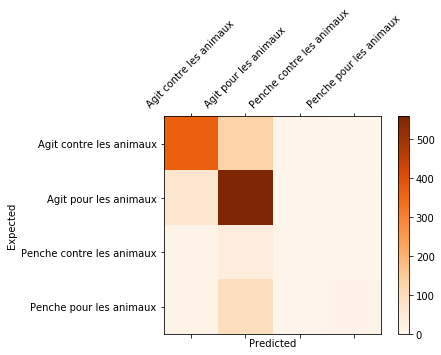

KNN
                           precision    recall  f1-score   support

  Agit contre les animaux       0.77      0.68      0.73      2445
    Agit pour les animaux       0.70      0.87      0.78      3222
Penche contre les animaux       0.57      0.16      0.24       244
  Penche pour les animaux       0.52      0.23      0.32       510

                 accuracy                           0.72      6421
                macro avg       0.64      0.48      0.52      6421
             weighted avg       0.71      0.72      0.70      6421

accuracy 0.7019455252918287
confusion matrix
                            Agit contre les animaux  Agit pour les animaux  \
Agit contre les animaux                        338                    155   
Agit pour les animaux                           76                    535   
Penche contre les animaux                       15                     26   
Penche pour les animaux                          7                     80   

                         

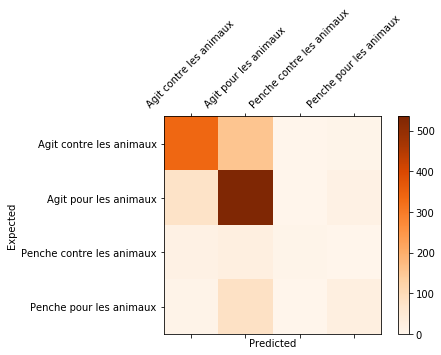

SVM
                           precision    recall  f1-score   support

  Agit contre les animaux       0.80      0.83      0.81      2445
    Agit pour les animaux       0.77      0.89      0.82      3222
Penche contre les animaux       0.73      0.09      0.16       244
  Penche pour les animaux       0.76      0.16      0.27       510

                 accuracy                           0.78      6421
                macro avg       0.76      0.49      0.52      6421
             weighted avg       0.78      0.78      0.75      6421

accuracy 0.7657587548638133
confusion matrix
                            Agit contre les animaux  Agit pour les animaux  \
Agit contre les animaux                        405                     94   
Agit pour les animaux                           63                    558   
Penche contre les animaux                       18                     28   
Penche pour les animaux                         15                     77   

                         

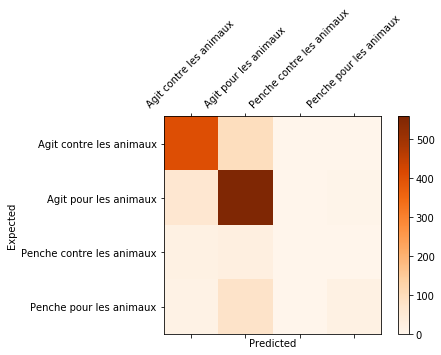

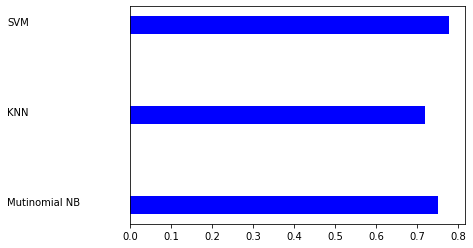

In [36]:
models = [
    ('Mutinomial NB', MultinomialNB()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', svm.SVC(kernel='linear'))
]

# Evaluation de chaque résultat
scores = []
names = []
scoring = 'accuracy'

# Validation croisée à 5 plis
kfold = model_selection.KFold(n_splits=5, shuffle=True)
for name, model in models:
    names.append(name)
    print(name)
    model_pipeline = make_pipeline(preprocess_pipeline,model)
    y_pred = model_selection.cross_val_predict(model_pipeline, X, y, 
                                               cv=kfold, n_jobs=2)
    print(classification_report(y, y_pred))
    acc = metrics.accuracy_score(y, y_pred)
    scores.append(acc)
    model_pipeline.fit(X_train, y_train)
    all_predictions = model_pipeline.predict(X_test)
    
    # all_predictions : classes prédites par l'algorithme d'apprentissage pour les données de test
    print('accuracy', accuracy_score(y_test, all_predictions))
    
    # Liste des labels se trouvant dans les données de test
    labels = np.unique(y_test)
    
    # Matrice de confusion
    cm =  confusion_matrix(y_test, all_predictions, labels=labels)
    
    # Matrice de confusion sous forme de DataFrame
    confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
    print('confusion matrix\n', confusion_df)
    print('(row=expected, col=predicted)')
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, all_predictions, labels) 
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Oranges) 
    fig.colorbar(cax) 
    tick_marks = np.arange(len(labels))
    labels_for_fig = [l for l in labels]
    plt.xticks(tick_marks, labels_for_fig, rotation=45)
    plt.yticks(tick_marks, labels_for_fig) 
    plt.xlabel('Predicted') 
    plt.ylabel('Expected') 
    plt.show()
    
# Représentation graphique
indices = np.arange(len(scores))
fig = plt.figure()
plt.barh(indices, scores, .2, label="score", color='b')
plt.yticks(())
for i, c in zip(indices, names):
    plt.text(-.3, i, c)
plt.show()